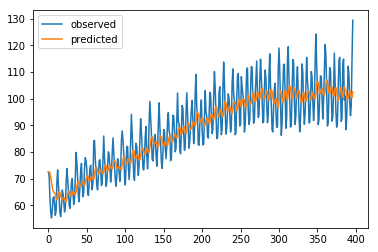

Root Mean square error 8.375966644763022


In [17]:
#triple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import math

from statsmodels.tsa.holtwinters import ExponentialSmoothing
# prepare data
r = pd.read_csv("Electric_Production.csv")
# create class
data=list(r['IPG2211A2N'])
model = ExponentialSmoothing(data)
model_fit = model.fit(smoothing_level=0.15,smoothing_slope=0.002,smoothing_seasonal=10,optimized=False)
# make prediction
yhat_te = model_fit.predict(0,396)
plt.plot(data,label="observed")
plt.plot(yhat_te,label="predicted")
plt.legend()
plt.show()

def Rms(f_t):
    mae=0#mean absolute error
    mape=0#mean absolute percentage error
    mse=0#mean square error
    rmse=0#root mean square error
    for i in range(len(f_t)):
        mae=mae+(abs(data[i]-f_t[i]))
        mape=mape+(abs(data[i]-f_t[i]))/f_t[i]
        mse=mse+((abs(data[i]-f_t[i])**2))
    mae=mae/(len(f_t))
    mape=(mape/len(f_t))*100
    mse=mse/(len(f_t))
    rmse=math.sqrt(mse)
    print("Root Mean square error",rmse)
    
Rms(yhat_te)